#                                   Netflix Data Analysis

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
netflix = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

In [200]:
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246


In [201]:
credits

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...
81350,449518,tm1072700,Kayode Olaiya,Uncle Adio,ACTOR
81351,2722717,tm1072700,Tolu Osaile,Sade,ACTOR
81352,2722797,tm1072700,Eniola Oyetola,Officer Meks,ACTOR
81353,866314,tm1072700,Tope Tedela,Officer Jack,ACTOR


## __Data preparation__

### Rename columns

In [202]:
netflix.rename(columns={'production_countries':'country'},inplace=True)

### Remove unwanted strings attached

In [203]:
netflix['genres']=netflix['genres'].str.replace('[','',regex=True)
netflix['genres']=netflix['genres'].str.replace(']','',regex=True)
netflix['genres']=netflix['genres'].str.replace("'",'',regex=True)

In [204]:
netflix['country']=netflix['country'].str.replace('[','',regex=True)
netflix['country']=netflix['country'].str.replace(']','',regex=True)
netflix['country']=netflix['country'].str.replace("'",'',regex=True)

In [205]:
netflix['country']= netflix['country'].replace('',np.nan,regex = True)

In [206]:
netflix['genres']= netflix['genres'].replace('',np.nan,regex = True)

In [207]:
netflix['country'] = netflix['country'].str.split(',')

In [208]:
netflix = netflix.explode('country')

In [209]:
netflix = netflix.reset_index(drop=True)

In [210]:
netflix['id']=netflix['id'].str.replace('\n', '')
netflix['title']=netflix['title'].str.replace('\n', '')
netflix['type']=netflix['type'].str.replace('\n', '')

netflix['id'] = netflix['id'].str.strip()
netflix['title'] = netflix['title'].str.strip()
netflix['type'] = netflix['type'].str.strip()

In [211]:
netflix['id'] = netflix['id'].str.strip()
netflix['title'] = netflix['title'].str.strip()
netflix['type'] = netflix['type'].str.strip()
netflix['description'] = netflix['description'].str.strip()
netflix['age_certification'] = netflix['age_certification'].str.strip()
netflix['genres'] = netflix['genres'].str.strip()
netflix['country'] = netflix['country'].str.strip()
netflix['imdb_id'] = netflix['imdb_id'].str.strip()

### Drop rows with null values

In [212]:
netflix.dropna(axis=0, how="any", subset=['genres','country'], inplace=True)

## Data exploration

# Count of movies and shows

In [213]:
drp_dup_row = netflix.drop_duplicates(subset='id', keep="first", inplace=False)

In [214]:
type_count = drp_dup_row['type'].value_counts()

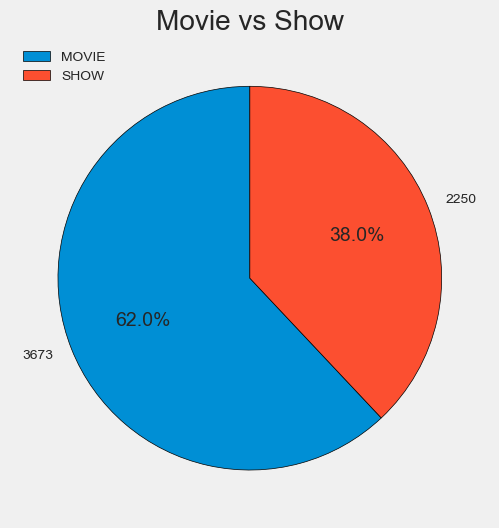

In [215]:
plt.style.use('fivethirtyeight')
plt.pie(type_count,labels=type_count,startangle=90,autopct='%1.1f%%',wedgeprops = {"edgecolor" : "black"})
plt.title('Movie vs Show')
plt.tight_layout()
plt.legend(loc = 'upper left', labels=type_count.index,fontsize='10')
plt.show()

# Count of Age Certification

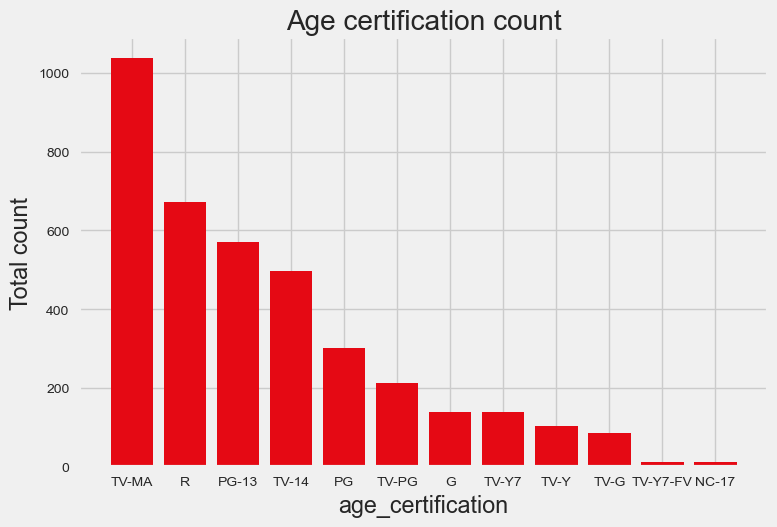

In [216]:
df = netflix['age_certification'].value_counts().reset_index()
df
x = df['index']
y = df['age_certification']

plt.style.use('fivethirtyeight')
plt.bar(x,y,color = '#E50914')

plt.xlabel('age_certification')
plt.ylabel('Total count')
plt.title('Age certification count')
plt.tight_layout()
plt.show()

# Number of movies and shows per country

In [217]:
country_grp = netflix.groupby(['country'])
group = country_grp[['type']].value_counts()
group

country  type 
AE       MOVIE    22
         SHOW      2
AF       MOVIE     2
AL       MOVIE     2
AO       MOVIE     1
                  ..
VN       MOVIE     4
         SHOW      1
ZA       MOVIE    42
         SHOW     14
ZW       MOVIE     1
Length: 165, dtype: int64

# Top 10 countries by number of movies

In [218]:
movie = netflix['type']=='MOVIE'
movie_df=netflix.loc[movie]
country_mvi_grp= movie_df.groupby(['country'])
top_10_countries_by_movie = country_mvi_grp[['type']].count().nlargest(10,'type')
top_10_countries_by_movie

,type
country,
US,1426
IN,597
GB,253
FR,170
ES,144
CA,140
JP,119
DE,109
NG,93


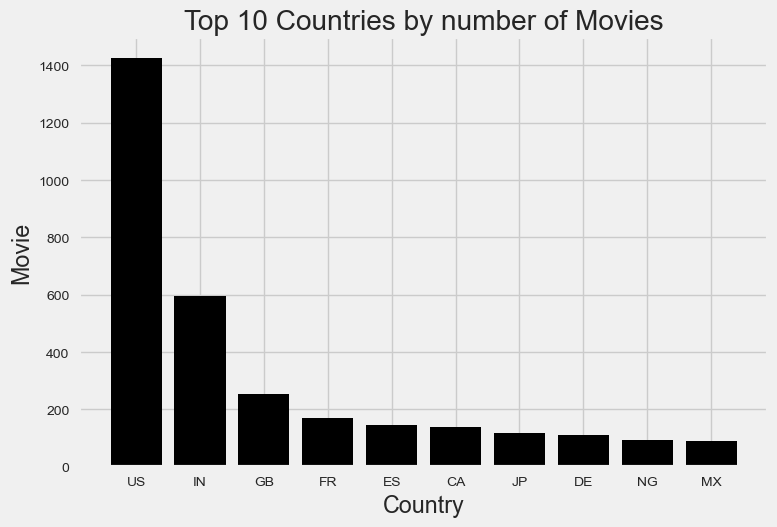

In [219]:
x = top_10_countries_by_movie.index
y = top_10_countries_by_movie['type']

plt.style.use('fivethirtyeight')
plt.bar(x,y,color = '#000000')

plt.xlabel('Country')
plt.ylabel('Movie')
plt.title('Top 10 Countries by number of Movies')
plt.tight_layout()
plt.show()

# Top 10 countries by number of shows

In [220]:
show = netflix['type']=='SHOW'
show_df=netflix.loc[show]
country_shw_grp= show_df.groupby(['country'])
top_10_countries_by_show = country_shw_grp[['type']].count().nlargest(10,'type')
top_10_countries_by_show 

,type
country,
US,880
KR,209
JP,184
GB,168
ES,87
FR,71
IN,58
CA,57
MX,56


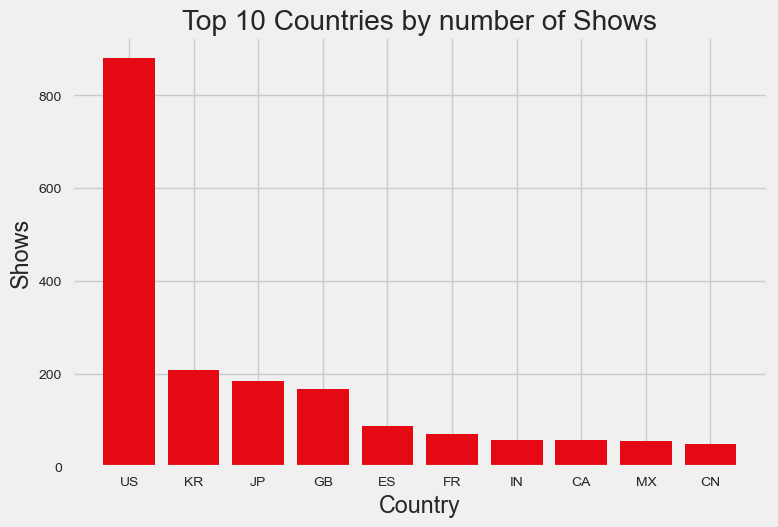

In [221]:
x = top_10_countries_by_show.index
y = top_10_countries_by_show['type']

plt.style.use('fivethirtyeight')
plt.bar(x,y,color = '#E50914')

plt.xlabel('Country')
plt.ylabel('Shows')
plt.title('Top 10 Countries by number of Shows')
plt.tight_layout()
plt.show()

# Total Movie and Show trends over Year

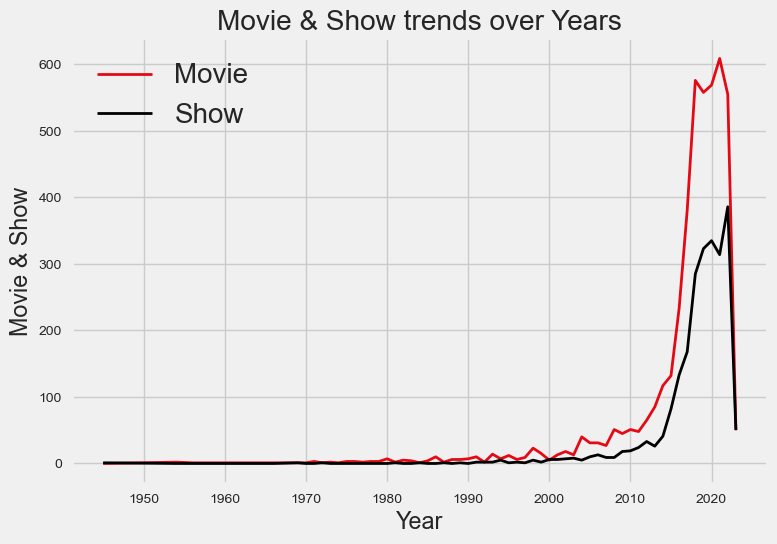

In [222]:
plt.style.use('fivethirtyeight')

movie_filt = netflix['type']== 'MOVIE'
show_filt = netflix['type']== 'SHOW'

movie_df = netflix.loc[movie_filt].groupby('release_year')['type'].count().reset_index()
show_df = netflix.loc[show_filt].groupby('release_year')['type'].count().reset_index()

df = movie_df.merge(show_df, on = 'release_year', how='outer')
df.columns = ['Year', 'Movie', 'Show']
df.fillna(0, inplace=True)
df = df.sort_values(by='Year')

plt.plot(df['Year'],df['Movie'], label='Movie',linewidth=2, color='#E50914')
plt.plot(df['Year'],df['Show'], label = 'Show', linewidth=2,color='#000000')
plt.xlabel('Year')
plt.ylabel('Movie & Show')
plt.title('Movie & Show trends over Years')
plt.legend(fontsize='20')
plt.show()

# Top imdb rated movie

In [223]:
grp = netflix.groupby(['type'])
grp[['imdb_score']].max()

,imdb_score
type,
MOVIE,9.0
SHOW,9.6


In [224]:
top_imdb_rate_movie = (netflix['imdb_score']==9.0) & (netflix['type']=='MOVIE')
netflix.loc[top_imdb_rate_movie]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
242,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",GB,NaN,tt0468569,9.0,2684317.0,81.703,8.508
243,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",US,NaN,tt0468569,9.0,2684317.0,81.703,8.508
253,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",NZ,NaN,tt0167260,9.0,1865989.0,83.617,8.474
254,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",US,NaN,tt0167260,9.0,1865989.0,83.617,8.474


# Top imdb rated show

In [225]:
top_imdb_rate_show = (netflix['imdb_score']==9.6) & (netflix['type']=='SHOW')
netflix.loc[top_imdb_rate_show]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2774,ts116101,Crazy Delicious,SHOW,Everyday meals are turned into extraordinary c...,2017,NaN,47,reality,GB,1.0,tt7626160,9.6,14.0,2.128,7.5


# Total number of each Genres

In [226]:
drp_duplicate_row = netflix.drop_duplicates(subset='id', keep="first", inplace=False)

In [227]:
new_df = pd.DataFrame(drp_duplicate_row['genres'])
new_df['genres'] = new_df['genres'].str.split()
new_df = new_df.explode('genres')
new_df['genres'] = new_df['genres'].str.replace(',','')
new_df = new_df.value_counts().reset_index()
new_df.columns = ['Genres','Number of contents']
new_df = new_df.sort_values(by=['Number of contents'], ascending=False)



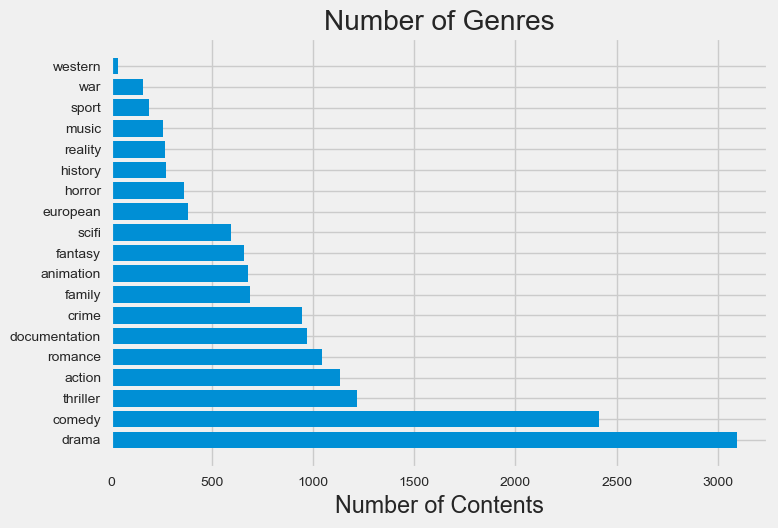

In [228]:
plt.style.use('fivethirtyeight')
plt.barh(new_df['Genres'],new_df['Number of contents'])
plt.title('Number of Genres')
plt.xlabel('Number of Contents')
plt.tight_layout()
plt.show()

# Max runtime movie in minutes

In [229]:
movie = netflix['type']=='MOVIE'
netflix.loc[movie].sort_values(by='runtime',ascending=False).head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
599,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,NaN,225,documentation,US,NaN,tt0492472,8.7,338.0,2.821,6.5


# Show with max seasons in minutes

In [230]:
show = netflix['type']=='SHOW'
netflix.loc[show].sort_values(by='seasons',ascending=False).head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,NaN,48,reality,US,44.0,tt0760143,7.5,25709.0,66.565,7.426


# Top 10 Actors by number of contents

In [231]:
actor = credits.query("role == 'ACTOR'")

actor.groupby(['name'])[['role']].count().sort_values(by='role', ascending=False).head(10)

,role
name,
Shah Rukh Khan,38
Boman Irani,24
Anupam Kher,23
Fred Tatasciore,21
Kareena Kapoor Khan,21
Aamir Khan,20
Kari Wahlgren,20
Naseeruddin Shah,19
Yuki Kaji,19


# Top 10 Directors by number of contents

In [232]:
director = credits.query("role == 'DIRECTOR'")

director.groupby(['name'])[['role']].count().sort_values(by='role', ascending=False).head(10)

,role
name,
Raúl Campos,20
Jan Suter,19
Ryan Polito,17
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,12
Youssef Chahine,12
Suhas Kadav,11
Jay Chapman,10


# Top imdb rating holding movie/show maker

In [233]:
# using merging method to join netflix and credits table

merged_df = pd.merge(netflix, credits, how='inner', on = 'id')
merged_df[['id','person_id','name','role','title','type','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]

,id,person_id,name,role,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm82169,3180,Sylvester Stallone,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
1,tm82169,7748,Talia Shire,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
2,tm82169,7749,Burt Young,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
3,tm82169,7750,Carl Weathers,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
4,tm82169,7751,Burgess Meredith,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
...,...,...,...,...,...,...,...,...,...,...,...
98988,tm1072700,449518,Kayode Olaiya,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98989,tm1072700,2722717,Tolu Osaile,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98990,tm1072700,2722797,Eniola Oyetola,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98991,tm1072700,866314,Tope Tedela,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000


# Director of top imdb rated movie

In [234]:
top_imdb_rate_movie = (merged_df['imdb_score']==9.0) & (merged_df['type']=='MOVIE') & (merged_df['role']=='DIRECTOR')
merged_df.loc[top_imdb_rate_movie][['title','type','name']]

,title,type,name
5228,The Dark Knight,MOVIE,Christopher Nolan
5363,The Dark Knight,MOVIE,Christopher Nolan
5855,The Lord of the Rings: The Return of the King,MOVIE,Peter Jackson
5934,The Lord of the Rings: The Return of the King,MOVIE,Peter Jackson


In [235]:
# top imdb rated show has no director

top_imdb_rate_show = (merged_df['imdb_score']==9.6) & (merged_df['type']=='SHOW') & (merged_df['role']=='DIRECTOR')
merged_df.loc[top_imdb_rate_show]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role


# Name of the persons in netflix who are actor and director both 

In [236]:
k=credits.groupby(['person_id','name']).agg({'role': list}).reset_index()

In [237]:
k['role'] = k['role'].apply(lambda x: ','.join(x))

In [238]:
k[k['role'].str.contains('|'.join(['ACTOR,DIRECTOR','DIRECTOR,ACTOR']))]['name']

81             Nora Ephron
106             Bo Burnham
268             Andy Nyman
374          Peter Jackson
384             Ron Howard
               ...        
49720         Myriam Fares
49837      Yedinson Flórez
52453       Steven Rinella
54590          Udoka Oyeka
56512    Khaled Al-Mufaidi
Name: name, Length: 433, dtype: object